In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [301]:
data = pd.read_csv("NSE.csv")

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


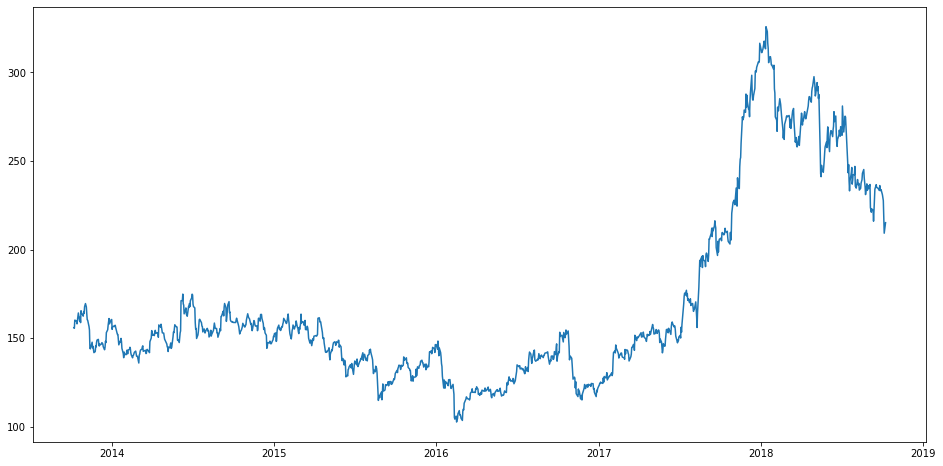

In [302]:
data.index = data['Date']

In [303]:
data=data.sort_index(ascending=True,axis=0)
new_data = pd.DataFrame(index=range(0,len(data)),columns = ['Date','Close'])
for i in range(len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

    
new_data.index = new_data.Date
new_data.drop('Date',axis=1,inplace=True)
f_data = new_data.values


train_data=f_data[0:987,:]
valid_data=f_data[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(f_data)

In [304]:
x_train,y_train=[],[]
for i in range(60,len(train_data)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

In [305]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [316]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=2,batch_size=1,verbose=2)

inputs_data=new_data[len(new_data)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

Epoch 1/2
927/927 - 18s - loss: 0.0013
Epoch 2/2
927/927 - 19s - loss: 5.7047e-04


In [317]:
test_x = []
for i in range(60,inputs_data.shape[0]):
    test_x.append(inputs_data[i-60:i,0])
test_x = np.array(test_x)

test_x = np.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))
pred = model.predict(test_x)
pred = scaler.inverse_transform(pred)
model.save("model.h5")

<ipython-input-318-3b4abe0f5adb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predict']=pred


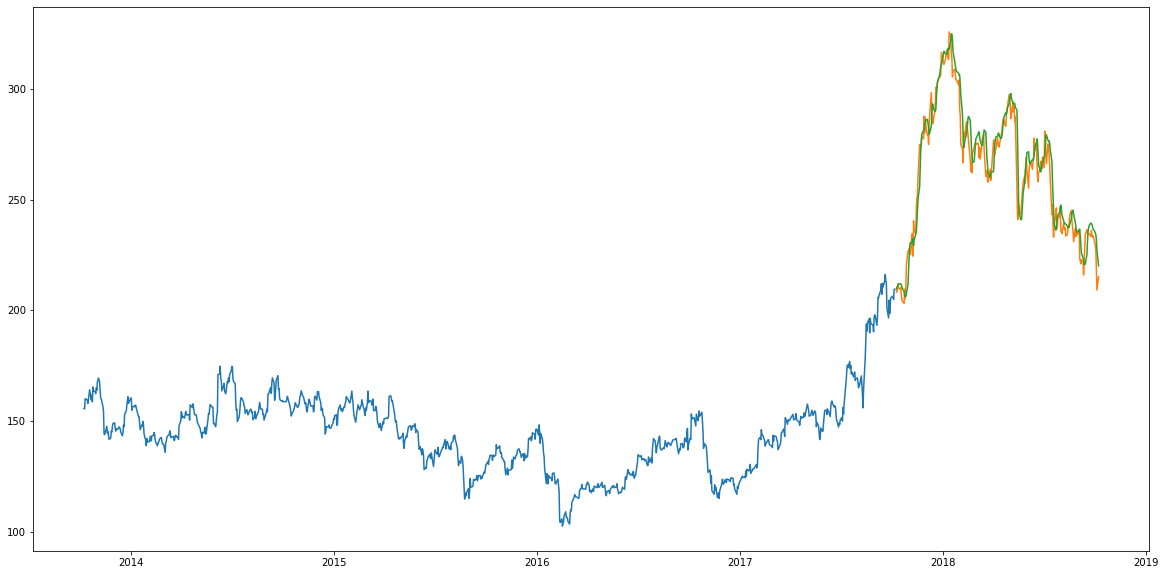

In [318]:
train_data=new_data[:987]
valid_data=new_data[987:]
valid_data['Predict']=pred
plt.plot(train_data["Close"])

plt.plot(valid_data[['Close','Predict']])